Mateo Tavares Trueba


# Optimización Bayesiana

**Teorema de Bayes**

$$ P(A|B) = \frac{P(B|A) P(A)}{P(B)} $$

$ P(A|B) $: Probabilidad condicional de A dado B. También conocida como la probabilidad posterior de A dado que B ocurre.

$ P(B|A) $: Probabilidad condicional de B dado A. Se interpreta como la verosimilitud (*likelihood*) de A.

$ P(A) $: Probabilidad de observar A. También conocida como probabilidad a priori.

$ P(B) $: Probabilidad de observar B. Interpretada como evidencia.

Utilizando las definiciones de arriba actualizamos la definición del teorema de bayes:

$$ \text{posterior} = \frac{(\text{verosimilitud})(\text{anterior})}{\text{evidencia}} $$

La intuición es que el teorema de Bayes es una herramienta para actualizar nuestras creencias dado lo que se tenía antes y nueva evidencia. Por ejemplo, tomas una moneda y asumes que es una moneda justa, dado que es lo más probable y que las monedas suelen ser justas en tu experiencia. Lanzas la moneda tres veces y cae sello las tres veces; un poco extraño, así que ajustas tus creencias y empiezas a imaginar que la moneda no es tan justa como debería ser. Lanzas las monedas tres veces y cae águila; ahora crees que la moneda es justa de nuevo.

## ¿Cómo aplicamos esto en nuestra vida diaria?

Imagina que tienes 3 puntos (conocimiento previo) en un espacio.

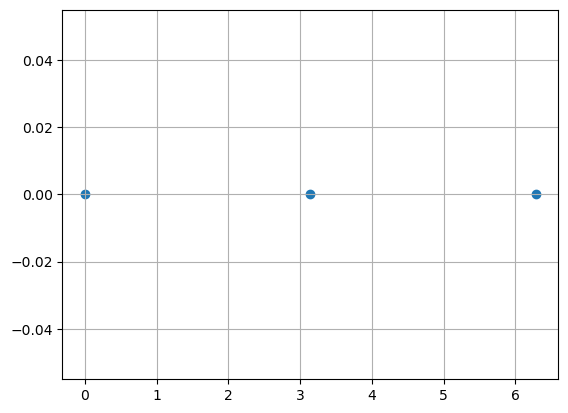

In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(); plt.scatter([0, np.pi, 2*np.pi], [0, 0, 0]); plt.grid()

No hay seguridad de cómo se conectan estos puntos, pero sabes que están conectados. Hay infinitas formas en las que estos puntos se pueden conectar.

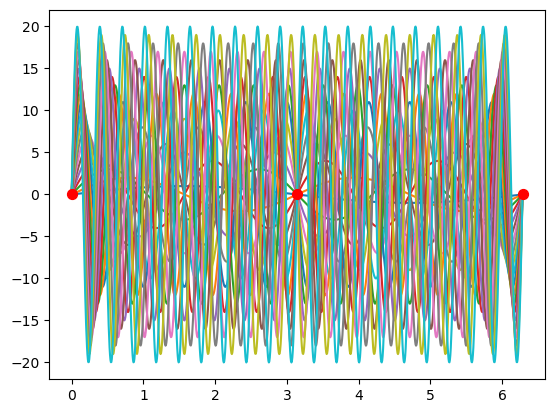

In [20]:
x = np.linspace(0, 2*np.pi, 1000); plt.figure(); 
for i in range(20) :
    y = (i+1)*np.sin((i+1)*x); plt.plot(x, y)
plt.scatter([0, np.pi, 2*np.pi], [0, 0, 0], s=50, c="r", zorder=3)

Hay tanta incertidumbre que decides pedir más información y te dan otro punto.

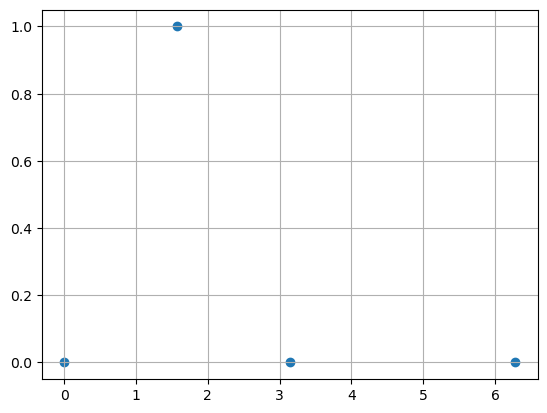

In [21]:
plt.figure(); plt.scatter([0, np.pi, 2*np.pi, np.pi/2], [0, 0, 0, 1]); plt.grid()

Con esta nueva información actualizas tus creencias y reduces la cantidad de formas en las que se conectan estos puntos (siguen siendo infinitas).

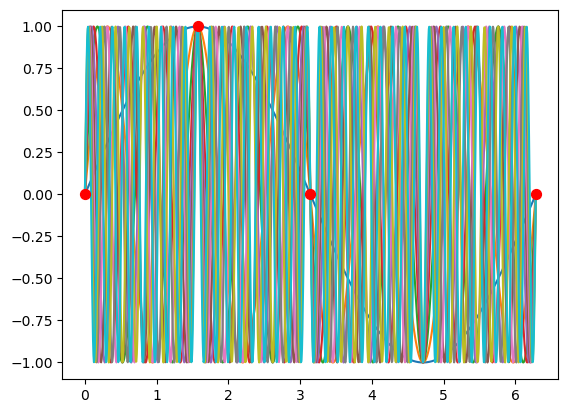

In [22]:
x = np.linspace(0, 2*np.pi, 1000); plt.figure(); 
for i in range(10) :
    y = np.sin((4*i+1)*x); plt.plot(x, y)
plt.scatter([0, np.pi, 2*np.pi, np.pi/2], [0, 0, 0, 1], s=50, c="r", zorder=3)

Te pones a pensar: "Sí. Teóricamente hay infinitas funciones que pueden conectar estos puntos, pero sólo algunas tienen sentido dado mi contexto."

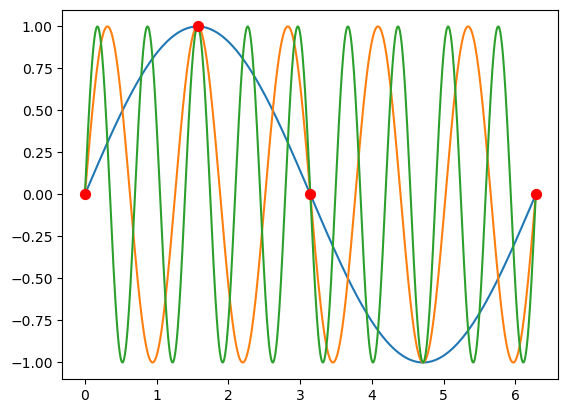

In [23]:
x = np.linspace(0, 2*np.pi, 1000); plt.figure(); 
for i in range(3) :
    y = np.sin((4*i+1)*x); plt.plot(x, y)
plt.scatter([0, np.pi, 2*np.pi, np.pi/2], [0, 0, 0, 1], s=50, c="r", zorder=3)

Ahora sólo quedan algunos pocos candidatos dado el criterio que tienes. Hay incertidumbre sobre cuál de estos candidatos podría ser el que mejor se ajusta, así que decides pedir más información. ¿Qué información serviría más?
- Se podría pedir el valor de $y$ cuando $x=\frac{3\pi}{2}$, pero los candidatos que tenemos todos pasan por el mismo punto. Incluso si nos dieran la información, no ayudaría de mucho.
- Se podría pedir fuera del rango que tenemos, pero quizás la información no existe o dado el contexto del problema es imposible que estos puntos existan.

Nos asignan nuestro último punto.

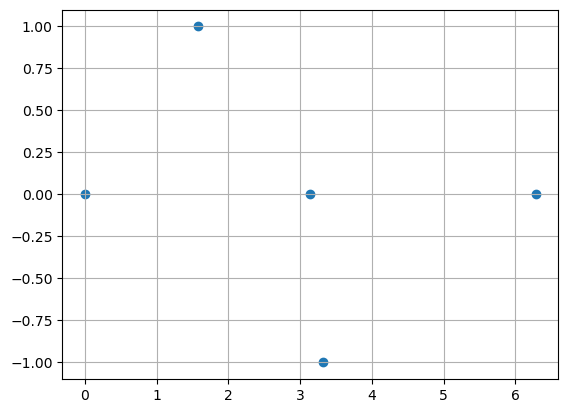

In [24]:
plt.figure(); plt.scatter([0, np.pi, 2*np.pi, np.pi/2, 19*np.pi/18], [0, 0, 0, 1, -1]); plt.grid()

Usamos esta nueva información (evidencia) junto con lo que conocíamos (anterior) y lo que creemos que es posible (verosimilitud) para decidir sobre una nueva función (posterior).

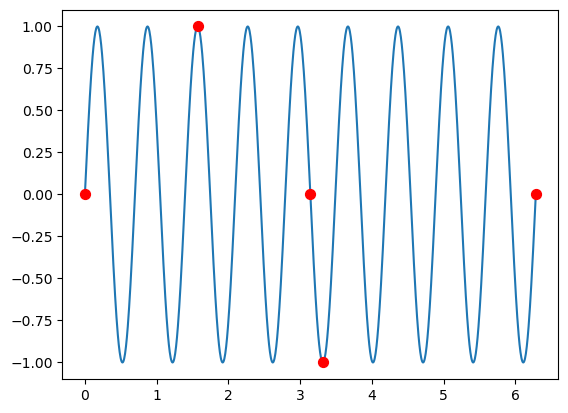

In [25]:
x = np.linspace(0, 2*np.pi, 1000); plt.figure(); y = np.sin(9*x); plt.plot(x, y)
plt.scatter([0, np.pi, 2*np.pi, np.pi/2, 19*np.pi/18], [0, 0, 0, 1, -1], s=50, c="r", zorder=3)

Una forma de realizar este experimento es mediante un proceso gaussiano, que asume que la variable de salida es una variable aleatoria con distribución normal multivariada. Utilicemos la función que encontramos y asumamos que no sabemos cuál es.

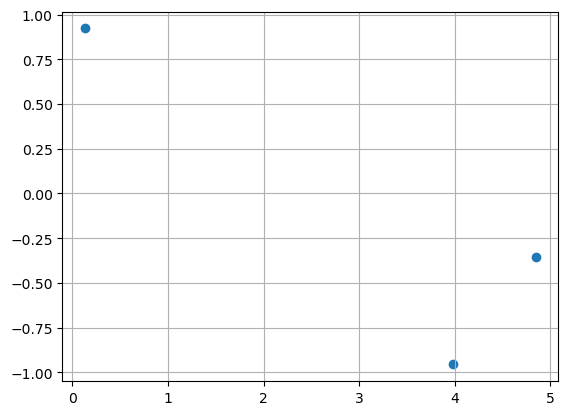

In [26]:
np.random.seed(10)
def f(x) :
    return np.sin(9*x)
X = np.random.uniform(0, 2*np.pi, 3).reshape([-1, 1])
plt.figure(); plt.scatter(X, f(X)); plt.grid()

Realizamos una regresión de proceso gaussiano para encontrar distribuciones que podrían darnos estas muestras

In [27]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
kernel = 1.0 * RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
y = f(X)
gp.fit(X, y)


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10)

Creamos un vector de valores posibles de $x$ y predecimos $y$ usando el resultado de la regresión.

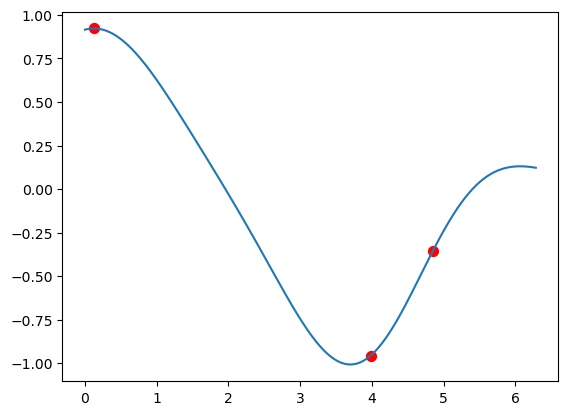

In [28]:
# Visualización de la predicción
x = np.linspace(0, 2*np.pi, 1000).reshape([-1, 1])
y_gorro = gp.predict(x)
import matplotlib.pyplot as plt
#Graficamos la funcion y los puntos
plt.figure(); plt.scatter(X, y, s=50, c="r", label="Datos"); plt.plot(x, y_gorro, label="Predicción GP")

Graficamos nuestra primera propuesta, utilizando el error estándar para dibujar nuestros intervalos de confianza.

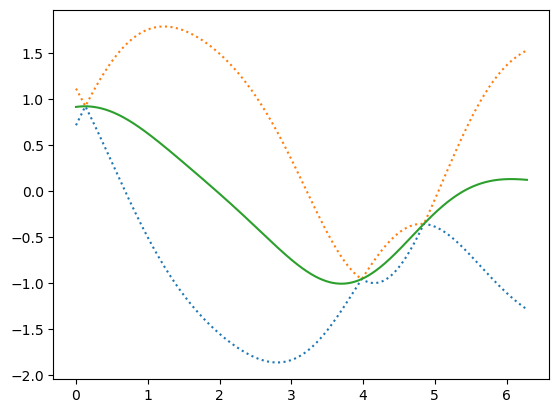

In [29]:
y_gorro,std = gp.predict(x,return_std=True)
#Intervalos de confianza al 95%
y_gorro_upper = y_gorro + 1.96*std
y_gorro_lower = y_gorro -1.96*std
plt.plot(x,y_gorro_lower, ls = ":",label = "Predicción")
plt.plot(x,y_gorro_upper, ls = ":",label = "Predicción")
plt.plot(x,y_gorro)

In [ ]:

x_next = x[np.argmax(std)]
x_next 

y_next = f(x_next)
y_next

array([-0.85152914])

Podemos ver que necesitamos más muestras debido a que hay mucha incertidumbre en algunas partes de nuestro dominio. Hay varios criterios para decidir cómo pedir muestras:
- Maximizar (busco mi predicción del máximo actual y pido esa medida)
- Minimizar (busco mi predicción del mínimo actual y pido esa medida)
- Reducir incertidumbre (busco el punto donde mi intervalo de confianza es más grande y pido esa medida)

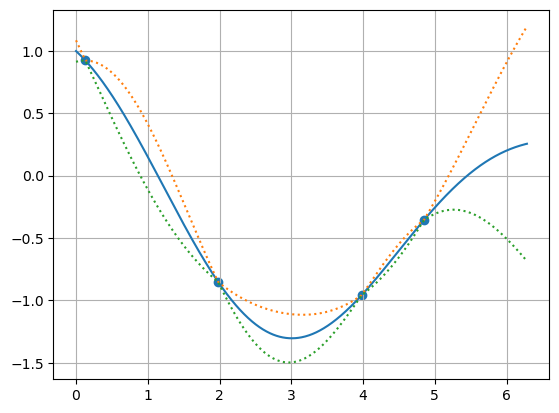

In [31]:
X = np.vstack((X, x_next))
y = np.vstack((y, y_next))
gp.fit(X, y)
x_range = np.linspace(0, 2*np.pi, 1000).reshape([-1, 1])
y_pred = gp.predict(x_range)
y_pred, uncertainty = gp.predict(x_range, return_std=True)
y_upper = y_pred + 1.96*uncertainty
y_lower = y_pred - 1.96*uncertainty
plt.figure();plt.scatter(X, f(X)); plt.plot(x_range, y_pred);plt.plot(x_range, y_upper, ls=':');plt.plot(x_range, y_lower, ls=':');plt.grid()

Y repetimos el proceso ya con nueva información.

Repitamos el proceso 30 veces con una función distinta.

$$ f(x) = \sin{(\frac{x}{3})} + \cos{(2x)},\ \ \ \ x \in [-5\pi, 5\pi] $$

C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {iteration+1:02d}: x_next = {float(next_sample):.4f}, y_next = {float(next_value):.4f}")
C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {iteration+1:02d}: x_next = {float(next_sample):.4f}, y_next = {float(next_value):.4f}")
C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element 

Iter 01: x_next = -10.7418, y_next = -0.4489
Iter 02: x_next = -6.3570, y_next = 0.1357
Iter 03: x_next = 12.5805, y_next = 0.1312
Iter 04: x_next = 15.7080, y_next = 0.1340


C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {iteration+1:02d}: x_next = {float(next_sample):.4f}, y_next = {float(next_value):.4f}")
C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {iteration+1:02d}: x_next = {float(next_sample):.4f}, y_next = {float(next_value):.4f}")


Iter 05: x_next = -3.1982, y_next = 0.1183
Iter 06: x_next = -8.5573, y_next = -0.4487


C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {iteration+1:02d}: x_next = {float(next_sample):.4f}, y_next = {float(next_value):.4f}")
C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {iteration+1:02d}: x_next = {float(next_sample):.4f}, y_next = {float(next_value):.4f}")
C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element 

Iter 07: x_next = -12.8948, y_next = 1.7074
Iter 08: x_next = 2.0823, y_next = 0.1190
Iter 09: x_next = 10.6318, y_next = -1.1383


C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {iteration+1:02d}: x_next = {float(next_sample):.4f}, y_next = {float(next_value):.4f}")
C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {iteration+1:02d}: x_next = {float(next_sample):.4f}, y_next = {float(next_value):.4f}")
C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element 

Iter 10: x_next = 5.9642, y_next = 1.7175
Iter 11: x_next = -4.7698, y_next = -1.9932
Iter 12: x_next = -1.6266, y_next = -1.5098


C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {iteration+1:02d}: x_next = {float(next_sample):.4f}, y_next = {float(next_value):.4f}")
C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {iteration+1:02d}: x_next = {float(next_sample):.4f}, y_next = {float(next_value):.4f}")
C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element 

Iter 13: x_next = 14.1521, y_next = -1.9995
Iter 14: x_next = -7.4572, y_next = -1.3111
Iter 15: x_next = -9.6574, y_next = 0.9712
Iter 16: x_next = -15.7080, y_next = 1.8660


C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {iteration+1:02d}: x_next = {float(next_sample):.4f}, y_next = {float(next_value):.4f}")
C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {iteration+1:02d}: x_next = {float(next_sample):.4f}, y_next = {float(next_value):.4f}")
C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element 

Iter 17: x_next = -11.8262, y_next = 0.8079
Iter 18: x_next = 1.0137, y_next = -0.1094
Iter 19: x_next = 3.1510, y_next = 1.8674


C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {iteration+1:02d}: x_next = {float(next_sample):.4f}, y_next = {float(next_value):.4f}")
C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {iteration+1:02d}: x_next = {float(next_sample):.4f}, y_next = {float(next_value):.4f}")
C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element 

Iter 20: x_next = -13.9478, y_next = 0.0689
Iter 21: x_next = 9.6102, y_next = 0.8702
Iter 22: x_next = 11.6061, y_next = -1.0073


C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {iteration+1:02d}: x_next = {float(next_sample):.4f}, y_next = {float(next_value):.4f}")
C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {iteration+1:02d}: x_next = {float(next_sample):.4f}, y_next = {float(next_value):.4f}")
C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element 

Iter 23: x_next = 6.8442, y_next = 1.1917
Iter 24: x_next = 5.0684, y_next = 0.2359
Iter 25: x_next = -3.9840, y_next = -1.0844


C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {iteration+1:02d}: x_next = {float(next_sample):.4f}, y_next = {float(next_value):.4f}")
C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {iteration+1:02d}: x_next = {float(next_sample):.4f}, y_next = {float(next_value):.4f}")
C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element 

Iter 26: x_next = 14.9379, y_next = -0.9340
Iter 27: x_next = -0.8565, y_next = -0.4234
Iter 28: x_next = -5.6027, y_next = -0.7480


C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {iteration+1:02d}: x_next = {float(next_sample):.4f}, y_next = {float(next_value):.4f}")
C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3972558805.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iter {iteration+1:02d}: x_next = {float(next_sample):.4f}, y_next = {float(next_value):.4f}")


Iter 29: x_next = 13.3349, y_next = -0.9307
Iter 30: x_next = -2.3967, y_next = -0.6357


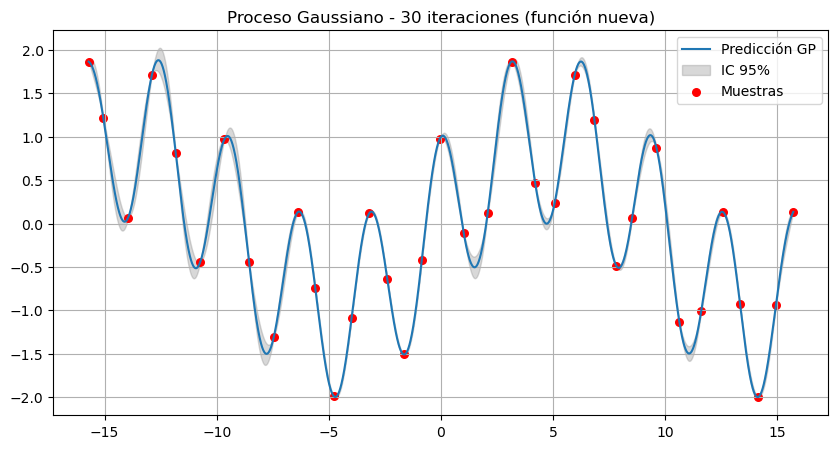

In [36]:


np.random.seed(10)
def objective_function(input_data):
    input_data = np.asarray(input_data)
    return (np.sin(input_data.ravel() / 3) + np.cos(2 * input_data.ravel())).ravel()
initial_points = np.random.uniform(-5 * np.pi, 5 * np.pi, 5).reshape(-1, 1)
target_values = objective_function(initial_points)
covariance_function = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=covariance_function, n_restarts_optimizer=5, normalize_y=True)
evaluation_grid = np.linspace(-5 * np.pi, 5 * np.pi, 2000).reshape(-1, 1)
total_iterations = 30
for iteration in range(total_iterations):
    gaussian_process.fit(initial_points, target_values)
    predictions, uncertainty_vals = gaussian_process.predict(evaluation_grid, return_std=True)
    next_sample = evaluation_grid[np.argmax(uncertainty_vals)].reshape(1, -1)
    next_value = objective_function(next_sample)
    initial_points = np.vstack((initial_points, next_sample))
    target_values = np.hstack((target_values, next_value))
    print(f"Iter {iteration+1:02d}: x_next = {float(next_sample):.4f}, y_next = {float(next_value):.4f}")
gaussian_process.fit(initial_points, target_values)
final_predictions, final_std = gaussian_process.predict(evaluation_grid, return_std=True)
plt.figure(figsize=(10,5))
plt.plot(evaluation_grid, final_predictions, label="Predicción GP")
plt.fill_between(evaluation_grid.ravel(), final_predictions - 1.96*final_std, final_predictions + 1.96*final_std, color="grey", alpha=0.3, label="IC 95%")
plt.scatter(initial_points, target_values, c="r", s=30, label="Muestras")
plt.title("Proceso Gaussiano - 30 iteraciones (función nueva)")
plt.legend(); plt.grid()


### Actividad

1. Modificar el comportamiento de selección para elegir el máximo de las predicciones como el siguiente punto.
2. Modificar el comportamiento de selección para elegir el mínimo de las predicciones como el siguiente punto.

c:\Users\mateo\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\mateo\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
c:\Users\mateo\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs",

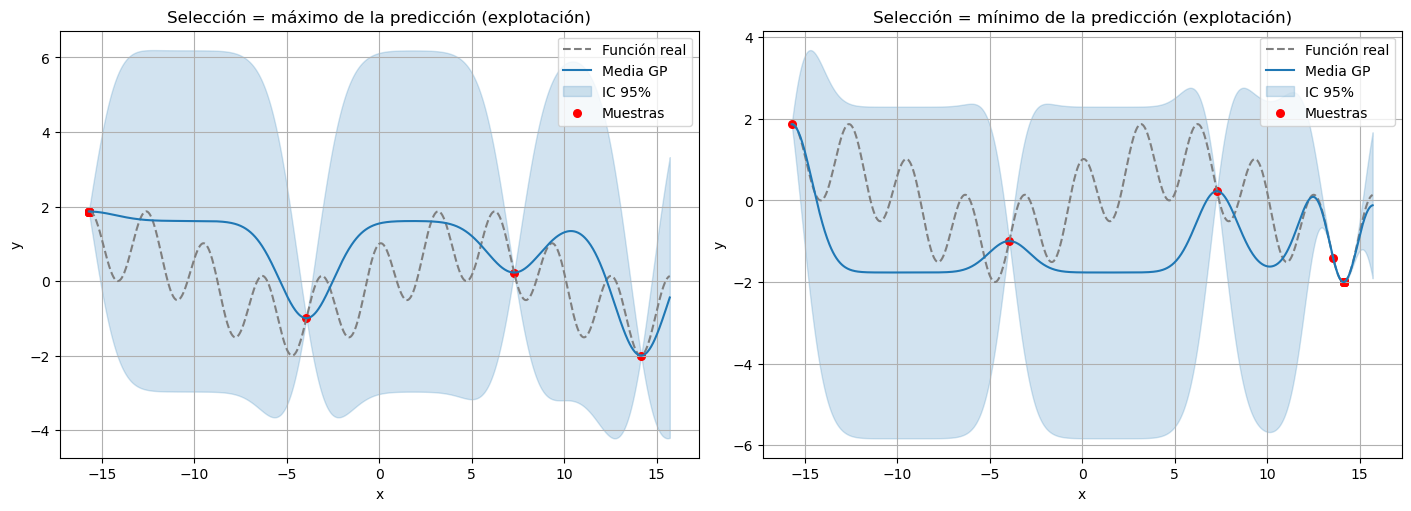

Último punto (max): -15.707963267948966 -> y = 1.8660254037844386
Último punto (min): 14.135594572458576 -> y = -1.9999949179650427


C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3861779724.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Último punto (max):", float(X_max_strat[-1]), "-> y =", float(y_max_strat[-1]))
C:\Users\mateo\AppData\Local\Temp\ipykernel_30068\3861779724.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Último punto (min):", float(X_min_strat[-1]), "-> y =", float(y_min_strat[-1]))


In [37]:

np.random.seed(42)
def target_func(x_input):
    x_input = np.asarray(x_input)
    return (np.sin(x_input.ravel() / 3) + np.cos(2 * x_input.ravel())).ravel()
domain_points = np.linspace(-5 * np.pi, 5 * np.pi, 1000).reshape(-1, 1)
true_values = target_func(domain_points)
start_points = np.random.uniform(-5 * np.pi, 5 * np.pi, 3).reshape(-1, 1)
start_values = target_func(start_points)
cov_func = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0)
gp_model = GaussianProcessRegressor(kernel=cov_func, n_restarts_optimizer=5, normalize_y=True)
def execute_experiment(strategy='max', init_X=None, init_y=None, iterations=30):
    current_X = init_X.copy()
    current_y = init_y.copy()
    for step in range(iterations):
        gp_model.fit(current_X, current_y)
        pred_vals, std_vals = gp_model.predict(domain_points, return_std=True)
        if strategy == 'max':
            selected_index = np.argmax(pred_vals)
        else:
            selected_index = np.argmin(pred_vals)
        new_point = domain_points[selected_index].reshape(1, -1)
        new_value = target_func(new_point)
        current_X = np.vstack((current_X, new_point))
        current_y = np.hstack((current_y, new_value))
    gp_model.fit(current_X, current_y)
    final_mean, final_std = gp_model.predict(domain_points, return_std=True)
    return current_X, current_y, final_mean, final_std
X_max_strat, y_max_strat, ymean_max_strat, ystd_max_strat = execute_experiment('max', start_points, start_values, iterations=30)
X_min_strat, y_min_strat, ymean_min_strat, ystd_min_strat = execute_experiment('min', start_points, start_values, iterations=30)
fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)
for ax, title, X_data, y_data, mean_vals, std_vals in [
    (axes[0], "Selección = máximo de la predicción (explotación)", X_max_strat, y_max_strat, ymean_max_strat, ystd_max_strat),
    (axes[1], "Selección = mínimo de la predicción (explotación)", X_min_strat, y_min_strat, ymean_min_strat, ystd_min_strat)
]:
    ax.plot(domain_points, true_values, ls='--', color='tab:gray', label='Función real')
    ax.plot(domain_points, mean_vals, color='tab:blue', label='Media GP')
    ax.fill_between(domain_points.ravel(), mean_vals - 1.96*std_vals, mean_vals + 1.96*std_vals, color='tab:blue', alpha=0.2, label='IC 95%')
    ax.scatter(X_data, y_data, c='r', s=30, label='Muestras')
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True)
    ax.legend(loc='upper right')
plt.show()
print("Último punto (max):", float(X_max_strat[-1]), "-> y =", float(y_max_strat[-1]))
print("Último punto (min):", float(X_min_strat[-1]), "-> y =", float(y_min_strat[-1]))
